# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient simulated in Pulse with no sepsis, with their sepsis counterpart. 

In [1]:
import pandas as pd
icustayid = 23870.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation_sepsis = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613238606.csv")
simulation_sepsis = simulation_sepsis.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation_sepsis.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,117.14840349104249,6628.4982481536235,0.32104340821050986,36.998511476961426,64.00110457840903,33.63648845949499,115.38461538461536,0.09550000000000014,92.85400609420547,0.9747722675244062,20.00000000000003,0.0,119.70298729626151,4.273863e+09
1,121.44393158382995,6991.000925227522,33.7835594187799,37.28823086096634,61.201810924434994,33.88395092926792,107.14285714285711,0.010000000000000009,93.22001367181534,0.974037800281707,20.134228187919494,10800.000000142898,122.98754848121615,4.273874e+09
2,109.53407575696194,7556.43751204041,1.8478810101265082,37.28777159648553,56.157518394457156,33.93006691007012,93.74999999999996,0.17499999999999982,93.65969413857877,0.9741651273229508,20.134228187919494,36000.00000010506,128.9546180243711,4.273899e+09
3,71.11034938018503,7737.404828907781,0.3355107901411532,37.286829791075206,53.38065569722522,33.94457648408006,88.23529411764703,-0.05,92.98162869166242,0.9741924143275768,20.134228187919494,46799.99999837629,130.9524534049177,4.273910e+09
4,99.93752975859053,8039.799990571174,29.096399142472055,37.28579065008398,51.363885379799484,33.958626536993634,83.3333333333333,-0.007,93.21189693976916,0.9742066543610174,20.134228187919494,68399.99999596066,133.82681702257582,4.273931e+09


In [5]:
len(simulation_sepsis)

59

In [6]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [7]:
len(simulation)

59

In [8]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,120.2125475722571,6628.470884580361,10.006833084029125,36.998703448312085,62.471961279149966,33.78486360133442,111.11111111111109,0.20100000000000023,92.53818267152128,0.9749255382648999,20.00000000000003,0.0,120.85616262665467,4.273863e+09
1,105.69211518926764,6996.2691894645795,34.01910333028408,37.2883636449655,59.988941059442745,33.88086674900105,103.44827586206893,-0.039,92.88455844469607,0.9740518068457706,20.134228187919494,10800.000000142898,123.68328053825756,4.273874e+09
2,128.95187174592178,7570.358522427485,0.836492150658509,37.287973075251216,55.13306402346384,33.92550986037014,90.90909090909086,0.04999999999999938,93.32550079557863,0.9741631523808923,20.134228187919494,36000.00000010506,129.5211667131711,4.273899e+09
3,100.71555481137412,7753.832974256775,0.3294103032418436,37.28721033034054,52.53148921232874,33.938498953125965,85.71428571428568,0.06300000000000017,92.42330188475401,0.9741765236292831,20.134228187919494,46799.99999837629,130.75339274201468,4.273910e+09
4,92.23411211655143,8059.596308273002,30.852665916163055,37.28609020267322,50.64448086627978,33.95622144510981,81.08108108108104,-0.007,93.12524263515539,0.974196181917133,20.134228187919494,68399.99999596066,134.62979845918943,4.273931e+09


In [9]:
time = simulation_sepsis['time']
diaBP_sepsis = simulation_sepsis['DiastolicArterialPressure (mmHg)']
diaBP_no_sepsis = simulation['DiastolicArterialPressure (mmHg)']

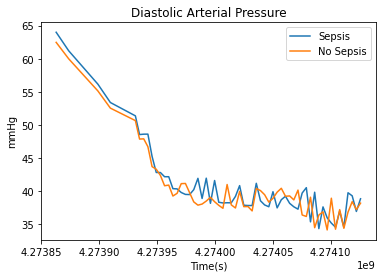

In [10]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_sepsis))
plt.plot(time, pd.to_numeric(diaBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

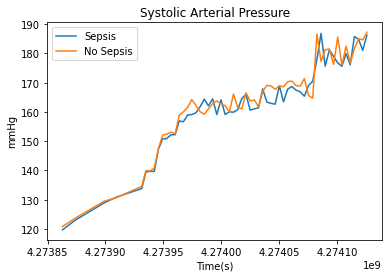

In [11]:
sysBP_sepsis = simulation_sepsis['SystolicArterialPressure (mmHg)']
sysBP_no_sepsis = simulation['SystolicArterialPressure (mmHg)']
plt.plot(time, pd.to_numeric(sysBP_sepsis))
plt.plot(time, pd.to_numeric(sysBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

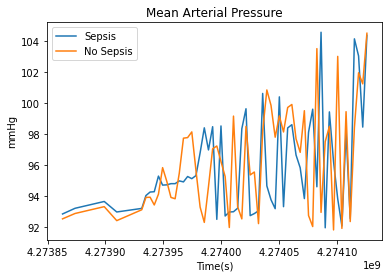

In [12]:
meanBP_sepsis = simulation_sepsis['MeanArterialPressure (mmHg)']
meanBP_no_sepsis = simulation['MeanArterialPressure (mmHg)']
plt.plot(time, pd.to_numeric(meanBP_sepsis))
plt.plot(time, pd.to_numeric(meanBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

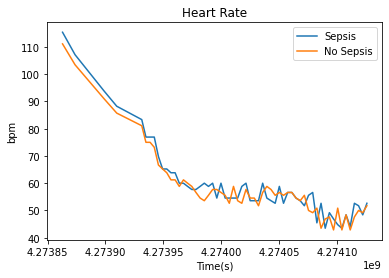

In [13]:
HR_sepsis = simulation_sepsis['HeartRate (1/min)']
HR_no_sepsis = simulation['HeartRate (1/min)']
plt.plot(time, pd.to_numeric(HR_sepsis))
plt.plot(time, pd.to_numeric(HR_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

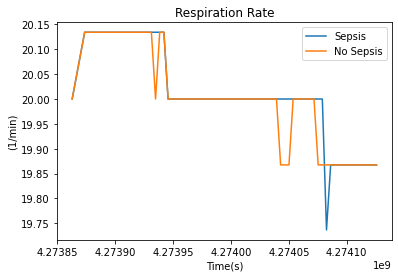

In [14]:
RR_sepsis = simulation_sepsis['RespirationRate (1/min)']
RR_no_sepsis = simulation['RespirationRate (1/min)']
plt.plot(time, pd.to_numeric(RR_sepsis))
plt.plot(time, pd.to_numeric(RR_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

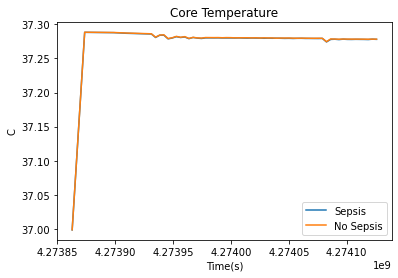

In [15]:
temp_sepsis = simulation_sepsis['CoreTemperature (degC)']
temp_no_sepsis = simulation['CoreTemperature (degC)']
plt.plot(time, pd.to_numeric(temp_sepsis))
plt.plot(time, pd.to_numeric(temp_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()